# Analytics for Unstructured Data (F2023) Assignment 2

Group Members: 
- Mayank Gupta (mg66426) 
- Rachana Aithal (ra39563) 
- Rahull Borana (rb47374) 
- Saiyam Shah (sns3694) 
- Sanjana Nayak (svn378)

In [2]:
#Please uncomment if not installed

# !pip install vaderSentiment

In [3]:
#Please uncomment if not installed

#!pip install spacy

In [4]:
#Please uncomment if medium sized pre trained spacy word vectors are not downloaded on your system

# !python -m spacy download en_core_web_md

In [5]:
#importing libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.linear_model import LinearRegression
from itertools import product
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from numpy.linalg import norm
from math import log
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment  import  SentimentIntensityAnalyzer
import spacy
from nltk import word_tokenize, pos_tag
stopwords = stopwords.words('english')


%matplotlib inline
sns.set(color_codes = True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Task A.
Extract about 5-6k reviews.

<span style="color:violet">


To obtain around 6000 reviews and around 18000 overall entries including the ones which had blank reviews and only ratings. We just ignored the entries with blank reviews and hence used the 6000 reviews for our analysis.

<span>

In [6]:
# Scraper code
# We have used a scrapy scraper for this exercise as we figured it was a fast way to scrape the data one-time. 
# We will be attaching the scrapy project folder along to run the scraper in case needed
# We can run it by running "scrapy crawl scraper -o beer_reviews.csv" in the same folder in which we see items and settings and middlewares files
# However, just attaching the scrapy spider code here for reference 

"""
import scrapy
from scraper.items import ScraperItem
from scrapy.selector import Selector
import requests
import re
import urllib.request
from urllib.parse import urlparse
from w3lib.html import  remove_tags
import unicodedata
import datetime
from urllib.parse import urljoin
from scraper import settings
import logging
from w3lib.http import basic_auth_header
from scrapy import signals
from pydispatch import dispatcher
from scrapy.http import FormRequest
from lxml.html import fromstring
from bs4 import BeautifulSoup


class scraper(scrapy.Spider):
    name="scraper"
    allowed_domains = ["beeradvocate.com"]
    
    PROJECT_ROOT=settings.PROJECT_ROOT

    def start_requests(self):
        url_list=['https://www.beeradvocate.com/beer/popular/','https://www.beeradvocate.com/beer/worst/',\
            'https://www.beeradvocate.com/beer/top-rated/','https://www.beeradvocate.com/beer/fame/',\
            'https://www.beeradvocate.com/beer/top-styles/','https://www.beeradvocate.com/beer/trending/']
        for i in url_list:
            yield scrapy.Request(i, callback=self.parse)

    def parse(self, response):
        hxs = Selector(response)
        urls= hxs.xpath(r'//*[@id="ba-content"]//td[2]/a/@href').extract()
        for quote in urls:
            print(quote)
            yield scrapy.Request(urljoin('https://www.beeradvocate.com',quote), callback=self.reviews)
    
    def reviews(self, response):
        hxs= Selector(response)
        name= hxs.xpath('//h1//text()').extract()[0]
        print(name)
        for i in hxs.xpath('//div[@id="rating_fullview_content_2"]'):
            body = BeautifulSoup(' '.join(i.xpath('./div/text()').extract()),'html.parser')
            body = body.get_text().strip()
            # print(body)
            if i.xpath('./span[@class="BAscore_norm"]'):
                rating = i.xpath('./span[@class="BAscore_norm"]/text()').extract()
            else:
                # continue
                rating = i.xpath("./span[@class='muted']/b/text()").extract()
            item= ScraperItem()
            item["item"]=name
            item["body"]= body
            item["rating"]= rating
            yield item

"""        

'\nimport scrapy\nfrom scraper.items import ScraperItem\nfrom scrapy.selector import Selector\nimport requests\nimport re\nimport urllib.request\nfrom urllib.parse import urlparse\nfrom w3lib.html import  remove_tags\nimport unicodedata\nimport datetime\nfrom urllib.parse import urljoin\nfrom scraper import settings\nimport logging\nfrom w3lib.http import basic_auth_header\nfrom scrapy import signals\nfrom pydispatch import dispatcher\nfrom scrapy.http import FormRequest\nfrom lxml.html import fromstring\nfrom bs4 import BeautifulSoup\n\n\nclass scraper(scrapy.Spider):\n    name="scraper"\n    allowed_domains = ["beeradvocate.com"]\n    \n    PROJECT_ROOT=settings.PROJECT_ROOT\n\n    def start_requests(self):\n        url_list=[\'https://www.beeradvocate.com/beer/popular/\',\'https://www.beeradvocate.com/beer/worst/\',            \'https://www.beeradvocate.com/beer/top-rated/\',\'https://www.beeradvocate.com/beer/fame/\',            \'https://www.beeradvocate.com/beer/top-styles/\',\'h

# Task B
Assume that a customer, who will be using this recommender system, has specified 3 attributes
in a product. E.g., one website describes multiple attributes of beer (but you should choose attributes
from the actual data)
Perform a word frequency analysis of beer reviews is a better way
to find important attributes in the actual data.

In [7]:
#Reading the excel with reviews

df=pd.read_excel('beer-reviews.xlsx')

In [8]:
df.head()

,item,body,rating
0,Kentucky Brunch Brand Stout,"Amazing stout, expensive but worth the price!",5.00
1,Kentucky Brunch Brand Stout,This beer meet and exceeded all the unreal hyp...,5.00
2,Kentucky Brunch Brand Stout,Let it sit and warm to the room a little ... u...,5.00
3,Kentucky Brunch Brand Stout,"A small pour, ebony dark, no real head. Intens...",4.67
4,Kentucky Brunch Brand Stout,"Vintage 2022, served on tap at Toppling Goliat...",5.00


In [9]:
#preprocessing steps
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words = [word for word in filtered_words if word.isalnum()]
    return " ".join(filtered_words)
df['body']=df['body'].str.lower()

df['body'] = df['body'].astype(str).apply(remove_stopwords)
df['body']


0                     amazing stout expensive worth price
1           beer meet exceeded unreal hype simply amazing
2                   let sit warm room little unbelievable
3       small pour ebony dark real head intense rich a...
4       vintage 2022 served tap toppling goliath snuli...
                              ...                        
6626    poured bottle snifter home thanks darin share ...
6627    good god man holy shit really good beer blesse...
6628    appearance bubble show lifts head fullsome thr...
6629    pours sure describe color golden yellow brown ...
6630    tropical nose sweet like sunnyd nice acidity a...
Name: body, Length: 6631, dtype: object

In [10]:
#We selected a list of beer related attributes from https://www.dummies.com/article/home-auto-hobbies/food-drink/beverages/beer/beer-for-dummies-cheat-sheet-208452/""

beer_attributes = [
    "aromatic", "hoppy", "malty", "bitter", "sweet", "sour", "fruity", "citrusy", "spicy", "floral", "earthy", "woody", "herbal", "caramel",
    "roasty", "nutty", "chocolatey", "smoky", "creamy", "crisp", "smooth", "hazy", "clear", "cloudy", "full-bodied", "light-bodied",
    "refreshing", "complex", "balanced", "robust", "dry", "sweetness", "alcohol content", "carbonation", "mouthfeel", "aftertaste",
    "head retention", "astringency", "esters", "phenols", "acidity", "diacetyl", "yeastiness", "clarification", "oxidation", "temperature",
    "abv (alcohol by volume)", "ibu (international bitterness units)", "srm (standard reference method)", "gravity", "fermentation", "lagering",
    "ale", "pilsner", "stout", "porter", "wheat", "lambic", "saison", "ipa (india pale ale)", "apa (american pale ale)", "dipa (double ipa)",
    "tripel", "quadrupel", "belgian", "german", "british", "american", "czech", "irish", "scottish", "baltic", "hefeweizen", "kolsch", "barleywine",
    "sours", "barrel-aged", "tropical", "funky", "crispy", "toasty", "tangy", "savory", "juicy", "effervescent", "velvety", "silky", "pungent",
    "robust", "elegant", "velvety", "bold", "harmonious", "well-rounded", "intense", "layered"]

In [11]:
# Calculate word frequencies using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['body'])

# Calculate the frequency of each word in the reviews
word_frequencies = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'frequency': np.array(X.sum(axis=0))[0]})
word_frequencies=word_frequencies.sort_values(['frequency'],ascending=False)
word_frequencies

,word,frequency
1829,beer,5266
7320,head,3650
14880,taste,3483
8867,light,2891
8885,like,2537
...,...,...
7520,hoax,1
7521,hobbyists,1
7526,hog,1
7527,hogan,1


In [12]:
# def is_adjective(word):
#     # Use NLTK's part-of-speech tagging to check if the word is an adjective
#     tagged_word = pos_tag([word])
#     return tagged_word[0][1] == 'JJ'

# # Apply the is_adjective function to the 'word' column and filter the DataFrame
# adjective_df = word_frequencies[word_frequencies['word'].apply(is_adjective)]

# # Print the filtered DataFrame containing adjectives
# print(adjective_df)

In [13]:
#Implementing keyword search based on the selected attributes
word_list = list(word_frequencies['word'])
attributes = [x for x in word_list if x in beer_attributes]
print(attributes)

['sweet', 'carbonation', 'mouthfeel', 'smooth', 'caramel', 'clear', 'sweetness', 'dry', 'bitter', 'malty', 'creamy', 'stout', 'balanced', 'crisp', 'hazy', 'earthy', 'ale', 'sour', 'aftertaste', 'floral', 'fruity', 'refreshing', 'spicy', 'complex', 'hoppy', 'belgian', 'herbal', 'tropical', 'american', 'wheat', 'juicy', 'cloudy', 'funky', 'roasty', 'woody', 'intense', 'silky', 'pilsner', 'porter', 'bold', 'acidity', 'citrusy', 'toasty', 'nutty', 'german', 'barleywine', 'esters', 'saison', 'temperature', 'tripel', 'robust', 'effervescent', 'velvety', 'tangy', 'lambic', 'gravity', 'astringency', 'smoky', 'pungent', 'aromatic', 'hefeweizen', 'oxidation', 'diacetyl', 'chocolatey', 'sours', 'savory', 'phenols', 'fermentation', 'layered', 'irish', 'british', 'elegant', 'crispy', 'czech', 'yeastiness', 'baltic', 'quadrupel', 'scottish', 'harmonious', 'kolsch']


In [14]:
array_df = pd.DataFrame({'attribute': attributes})
attr_word_freq=word_frequencies.merge(array_df,left_on='word', right_on='attribute')
attr_word_freq= attr_word_freq.drop('attribute',axis=1)
attr_word_freq

,word,frequency
0,sweet,2145
1,carbonation,1825
2,mouthfeel,1175
3,smooth,1042
4,caramel,966
...,...,...
75,baltic,8
76,quadrupel,5
77,scottish,3
78,harmonious,3


<span style="color:violet">

**"Sweet", "carbonation" and "mouthfeel" are most frequently used attributes as per the analysis. We will ignore "Sweet" since it can be used to describe mood as well and "Mouthfeel" since it is more of an umbrella term. Hence the 3 attributes selected are "carbonation", "smooth" and "caramel"**

<span>

## Task C

Perform a similarity analysis using cosine similarity (without word embeddings) with the 3 attributes specified by the customer and the reviews.
The similarity script should accept as input a file with the product attributes, and calculate similarity scores (between 0 and 1) between these attributes and each review. That is, the output file should have 3 columns – product_name (for each product, the product_name will repeat as many times as there are reviews of the product), product_review and similarity_score.


In [15]:
#open text file in read mode
text_file = open("attributes.txt", "r")
user_pref = text_file.read().lower()
#close file

text_file.close()

words_to_compare = user_pref.split(',')

words_to_compare = [word.strip() for word in words_to_compare]

words_to_compare


['carbonation', 'smooth', 'caramel']

In [16]:
import numpy as np

# Assuming 'result_df' contains columns 'item' and 'body' as you mentioned
result_df = df[['item', 'body']]

# Split the 'body' column into lists of words
result_df['body'] = result_df['body'].apply(lambda x: x.split())

# Calculate the cosine similarity for each row
def calculate_cosine_similarity(words1, words2):
    # Convert the lists of words to sets to remove duplicates
    set1 = set(words1)
    set2 = set(words2)

    # Calculate the intersection (common words)
    intersection = set1.intersection(set2)

    # Calculate the cosine similarity using the formula
    if len(set1) == 0 or len(set2) == 0:
        return 0.0  # Handle the case of empty sets to avoid division by zero
    else:
        cosine_similarity = len(intersection) / (np.sqrt(len(set1)) * np.sqrt(len(set2)))
        return cosine_similarity

# Calculate the similarity score for each row
result_df['similarity score'] = result_df.apply(lambda row: calculate_cosine_similarity(words_to_compare, row['body']), axis=1)
result_df['body'] = df['body']
# Sort the DataFrame by 'similarity score' in descending order
result_df.sort_values(by='similarity score', ascending=False, inplace=True)

# Display the sorted DataFrame
result_df


C:\Users\rahul\AppData\Local\Temp\ipykernel_15044\941276859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['body'] = result_df['body'].apply(lambda x: x.split())


,item,body,similarity score
2253,Honker's Ale,smooth drink,0.408248
3672,Upper Case,smooth 9,0.408248
6573,A Deal With The Devil - Double Oak-Aged,thick sweet big barrel flavors smooth sign hop...,0.397360
3040,Voodoo Ranger Juicy Haze IPA,smooth tasting yummy,0.333333
3224,Old Stock Cellar Reserve (Aged In Brandy Barrels),2020 version bottle pour snifter looks like br...,0.327327
...,...,...,...
2757,Genesee Ice Beer,12 ounce poured nonic tumbler l white head min...,0.000000
2756,Genesee Ice Beer,average ice beer refreshing hot summer day,0.000000
2755,Genesee Ice Beer,bought 24oz budget much sense appearance smell...,0.000000
2754,Palma Louca Pale Pilsner,really digging wild palm nice drinkability ful...,0.000000


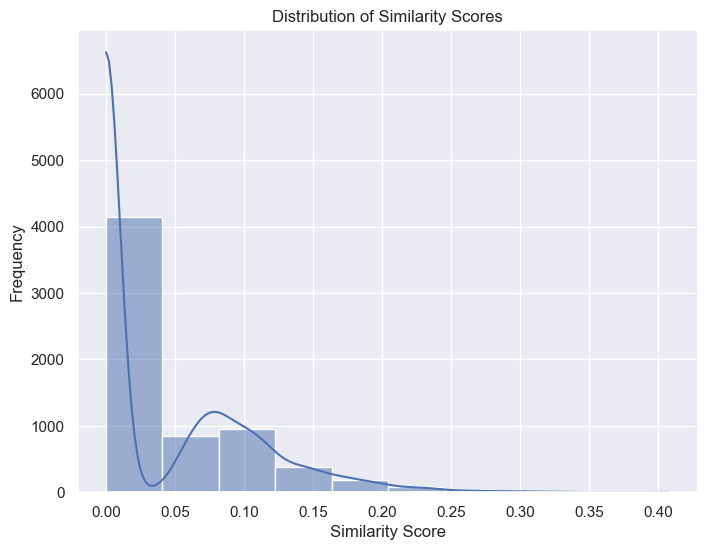

In [17]:
# Plot the distribution of similarity scores
plt.figure(figsize=(8, 6))
sns.histplot(data=result_df, x='similarity score', bins=10, kde=True)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Scores')
plt.show()

## Task D

For every review, perform a sentiment analysis (using VADER or any LLM). In case you have to change the default values of words in the VADER lexicon

In [18]:
#manually initializing the default sentiment scores for our attributes to 0 in Vader lexicon
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


new_words = {
    words_to_compare[0] : 0,
    words_to_compare[1] : 0,
    words_to_compare[2] : 0
}


analyzer.lexicon.update(new_words)


In [19]:
# Function to perform sentiment analysis using VADER
def perform_sentiment_analysis(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

sentiment_similarity_df = result_df
sentiment_similarity_df.rename(columns={'item':'Product Name'},inplace = True)
# Applying sentiment analysis to each review and store the scores in a new column
sentiment_similarity_df['Sentiment Scores'] = sentiment_similarity_df['body'].apply(perform_sentiment_analysis)

sentiment_similarity_df

,Product Name,body,similarity score,Sentiment Scores
2253,Honker's Ale,smooth drink,0.408248,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3672,Upper Case,smooth 9,0.408248,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6573,A Deal With The Devil - Double Oak-Aged,thick sweet big barrel flavors smooth sign hop...,0.397360,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp..."
3040,Voodoo Ranger Juicy Haze IPA,smooth tasting yummy,0.333333,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou..."
3224,Old Stock Cellar Reserve (Aged In Brandy Barrels),2020 version bottle pour snifter looks like br...,0.327327,"{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'comp..."
...,...,...,...,...
2757,Genesee Ice Beer,12 ounce poured nonic tumbler l white head min...,0.000000,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp..."
2756,Genesee Ice Beer,average ice beer refreshing hot summer day,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2755,Genesee Ice Beer,bought 24oz budget much sense appearance smell...,0.000000,"{'neg': 0.232, 'neu': 0.461, 'pos': 0.307, 'co..."
2754,Palma Louca Pale Pilsner,really digging wild palm nice drinkability ful...,0.000000,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp..."


## Task E

Create an evaluation score for each beer that uses both similarity and sentiment scores.
Now recommend 3 products to the customer.


In [20]:
# Function to calculate the evaluation score using
def calculate_evaluation_score(similarity_score, sentiment_score):
    overall_sentiment_score = sentiment_score['compound']
    # Calculate the evaluation score as a weighted sum
    evaluation_score = similarity_score*overall_sentiment_score
    return evaluation_score

# Calculate the evaluation score for each beer
sentiment_similarity_df['Evaluation Score'] = sentiment_similarity_df.apply(lambda x: calculate_evaluation_score(x['similarity score'], x['Sentiment Scores']), axis=1)

# Group by 'Product Name' and calculate the mean of 'Evaluation Score' for each product
sentiment_similarity_df = sentiment_similarity_df.groupby('Product Name')['Evaluation Score'].mean().reset_index()

# Sort the products by their average evaluation scores in descending order
sentiment_similarity_df.sort_values(by='Evaluation Score', ascending=False, inplace=True)

# Display the DataFrame with sorted results
sentiment_similarity_df




,Product Name,Evaluation Score
543,Miles To Go Before I Sleep,0.141856
411,Hop Rod Rye,0.126886
299,Double Sunshine,0.118252
148,Brewer's Reserve Bourbon Barrel Stout,0.117937
839,Triple Sunshine,0.115529
...,...,...
868,Warsteiner Premium Fresh,-0.012831
799,Tennent's Super Strong Lager,-0.012873
697,Redd's Apple Ale,-0.014598
686,Raison D'√ätre,-0.018215


In [21]:
# Display the top 3 recommended products
print('The top 3 recommended products based on evaluation score are:')
top_3_brands_cosine=sentiment_similarity_df.head(3).reset_index(drop=True)
top_3_brands_cosine

The top 3 recommended products based on evaluation score are:


,Product Name,Evaluation Score
0,Miles To Go Before I Sleep,0.141856
1,Hop Rod Rye,0.126886
2,Double Sunshine,0.118252


# Task F

In [22]:
# Load spaCy with medium-sized pretrained word vectors
nlp = spacy.load('en_core_web_md')

words_to_compare=' '.join(words_to_compare)
# Function to calculate word vector similarity
def word_vector_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

def calculate_evaluation_score(row):
    similarity_score = row['Similarity Score']
    sentiment_score = row['Sentiment Score']['compound']

    evaluation_score = similarity_score * sentiment_score
    return evaluation_score

# Create a new DataFrame with product name, product review, and similarity score
result_df = pd.DataFrame({
    'Product Name': df['item'],
    'Product Review': df['body'],
    'Similarity Score': ''
})

result_df['Similarity Score'] = result_df['Product Review'].apply(word_vector_similarity, text2=words_to_compare)
result_df['Sentiment Score'] = result_df['Product Review'].apply(perform_sentiment_analysis)
result_df['Evaluation Score'] = result_df.apply(calculate_evaluation_score, axis=1)

sentiment_similarity_df=result_df.groupby('Product Name')['Evaluation Score'].agg('mean').reset_index().sort_values(by='Evaluation Score',ascending = False).reset_index(drop=True)

# Recommend the top 3 brands based on the highest evaluation scores
top_3_brands_word_vec = sentiment_similarity_df.head(3)[['Product Name', 'Evaluation Score']].reset_index(drop=True)

# Display the recommended top 3 brands
print("Top 3 Recommended Brands:")
print(top_3_brands_word_vec)

C:\Users\rahul\AppData\Local\Temp\ipykernel_15044\2459434750.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


Top 3 Recommended Brands:
                 Product Name  Evaluation Score
0          It Was All A Dream          0.729133
1     Wide Awake It's Morning          0.728481
2  Miles To Go Before I Sleep          0.726045


In [23]:
sentiment_similarity_df

,Product Name,Evaluation Score
0,It Was All A Dream,0.729133
1,Wide Awake It's Morning,0.728481
2,Miles To Go Before I Sleep,0.726045
3,Morning Wood,0.691480
4,Double Sunshine,0.689666
...,...,...
896,Beck's Light,-0.063014
897,Warsteiner Premium Fresh,-0.100393
898,Barrel Aged Imperial German Chocolate Cupcake ...,-0.162599
899,Brahma,-0.195406


In [24]:
result_df

,Product Name,Product Review,Similarity Score,Sentiment Score,Evaluation Score
0,Kentucky Brunch Brand Stout,amazing stout expensive worth price,0.422889,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",0.317421
1,Kentucky Brunch Brand Stout,beer meet exceeded unreal hype simply amazing,0.293538,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'comp...",0.171984
2,Kentucky Brunch Brand Stout,let sit warm room little unbelievable,0.346149,"{'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compou...",0.118210
3,Kentucky Brunch Brand Stout,small pour ebony dark real head intense rich a...,0.630081,"{'neg': 0.022, 'neu': 0.684, 'pos': 0.293, 'co...",0.616093
4,Kentucky Brunch Brand Stout,vintage 2022 served tap toppling goliath snuli...,0.742569,"{'neg': 0.051, 'neu': 0.798, 'pos': 0.15, 'com...",0.589006
...,...,...,...,...,...
6626,Pliny The Younger,poured bottle snifter home thanks darin share ...,0.375230,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.319659
6627,Pliny The Younger,good god man holy shit really good beer blesse...,0.410293,"{'neg': 0.094, 'neu': 0.518, 'pos': 0.388, 'co...",0.402333
6628,King JJJuliusss,appearance bubble show lifts head fullsome thr...,0.708931,"{'neg': 0.033, 'neu': 0.829, 'pos': 0.137, 'co...",0.576077
6629,King JJJuliusss,pours sure describe color golden yellow brown ...,0.665072,"{'neg': 0.157, 'neu': 0.624, 'pos': 0.219, 'co...",0.357742


In [25]:
result_df['Sentiment'] = result_df['Sentiment Score'].apply(lambda x: x['compound'])
result_df=result_df.drop(['Sentiment Score'],axis=1)
result_df

,Product Name,Product Review,Similarity Score,Evaluation Score,Sentiment
0,Kentucky Brunch Brand Stout,amazing stout expensive worth price,0.422889,0.317421,0.7506
1,Kentucky Brunch Brand Stout,beer meet exceeded unreal hype simply amazing,0.293538,0.171984,0.5859
2,Kentucky Brunch Brand Stout,let sit warm room little unbelievable,0.346149,0.118210,0.3415
3,Kentucky Brunch Brand Stout,small pour ebony dark real head intense rich a...,0.630081,0.616093,0.9778
4,Kentucky Brunch Brand Stout,vintage 2022 served tap toppling goliath snuli...,0.742569,0.589006,0.7932
...,...,...,...,...,...
6626,Pliny The Younger,poured bottle snifter home thanks darin share ...,0.375230,0.319659,0.8519
6627,Pliny The Younger,good god man holy shit really good beer blesse...,0.410293,0.402333,0.9806
6628,King JJJuliusss,appearance bubble show lifts head fullsome thr...,0.708931,0.576077,0.8126
6629,King JJJuliusss,pours sure describe color golden yellow brown ...,0.665072,0.357742,0.5379


In [26]:
#Let's analyze the difference by considering the % of reviews that mention a preferred attribute

words_to_compare=words_to_compare.split(' ')
def calculate_percentage_of_words(df, words):
    percentages = {}
    
    for word in words:
        count = len(df[df['body'].str.contains(word)])
        percentage = (count / len(df)) * 100
        percentages[word] = percentage
    return percentages


##### % of reviews that mention a preferred attribute from the top products based on Word Vectors

In [27]:

percent_list=[]
li=top_3_brands_word_vec['Product Name'].tolist()
for i in li:
    df_temp=df[df['item']==i]
    res=calculate_percentage_of_words(df_temp,words_to_compare)
    percent_list.append(res)

top_3_brands_word_vec['Percentages of reviews with attributes']=percent_list
top_3_brands_word_vec = pd.concat([top_3_brands_word_vec.drop(['Percentages of reviews with attributes'], axis=1),
                pd.json_normalize(top_3_brands_word_vec['Percentages of reviews with attributes']).add_prefix('Percentages of reviews with ')], axis=1)
top_3_brands_word_vec

,Product Name,Evaluation Score,Percentages of reviews with carbonation,Percentages of reviews with smooth,Percentages of reviews with caramel
0,It Was All A Dream,0.729133,100.0,0.0,0.0
1,Wide Awake It's Morning,0.728481,100.0,0.0,100.0
2,Miles To Go Before I Sleep,0.726045,100.0,0.0,100.0


In [28]:
df_word_vec_brands['body'].apply(calculate_similar_words)

# Print the resulting DataFrame
result_df

NameError: name 'df_word_vec_brands' is not defined

In [ ]:
words_to_compare

['carbonation', 'smooth', 'caramel']

##### % of reviews that mention a preferred attribute from the top products based on Cosine Similarity

In [ ]:
percent_list=[]
li=top_3_brands_cosine['Product Name'].tolist()
for i in li:
    df_temp=df[df['item']==i]
    res=calculate_percentage_of_words(df_temp,words_to_compare)
    percent_list.append(res)

top_3_brands_cosine['Percentages of reviews with attributes']=percent_list
top_3_brands_cosine = pd.concat([top_3_brands_cosine.drop(['Percentages of reviews with attributes'], axis=1),
                pd.json_normalize(top_3_brands_cosine['Percentages of reviews with attributes']).add_prefix('Percentages of reviews with ')], axis=1)
top_3_brands_cosine

,Product Name,Evaluation Score,Percentages of reviews with carbonation,Percentages of reviews with smooth,Percentages of reviews with caramel,Percentages of reviews with carbonation,Percentages of reviews with smooth,Percentages of reviews with caramel
0,Miles To Go Before I Sleep,0.141856,100.000000,0.000000,100.000000,100.000000,0.000000,100.000000
1,Hop Rod Rye,0.126886,80.000000,60.000000,60.000000,80.000000,60.000000,60.000000
2,Double Sunshine,0.118252,66.666667,66.666667,33.333333,66.666667,66.666667,33.333333


In [ ]:
#To illustrate why the word vector approach is better, let's find similar words to the user attributes in the reviews of the top 3 recommended beers

#Going to print out the most similar words from the reviews based on a certiain similarity threshold

df_word_vec_brands=df[(df['item']==top_3_brands_word_vec['Product Name'][0]) | (df['item']==top_3_brands_word_vec['Product Name'][1]) | (df['item']==top_3_brands_word_vec['Product Name'][2])]

# Create a dictionary to store sets of similar words
similar_words_sets = {word: set() for word in words_to_compare}

# Function to calculate similar words and store them in sets
def calculate_similar_words(text):
    doc = nlp(text)
    
    for word1 in words_to_compare:
        similar_words = set()
        
        for token in doc:
            similarity_score = token.similarity(nlp(word1))
            
            if similarity_score > 0.6:  # You can adjust this threshold as needed
                similar_words.add(token.text)
        
        similar_words_sets[word1].update(similar_words)
    
descriptions = df_word_vec_brands['body'].tolist()

# Apply the function to each description
for description in descriptions:
    calculate_similar_words(description)

# Print the sets of similar words for each fixed word
for word, similar_words_set in similar_words_sets.items():
    print(f"Similar words for '{word}': {', '.join(similar_words_set)}")

C:\Users\rahul\AppData\Local\Temp\ipykernel_3540\3754710723.py:18: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  similarity_score = token.similarity(nlp(word1))


Similar words for 'carbonation': resulting, retention, carbonation
Similar words for 'smooth': texture, soft
Similar words for 'caramel': flavor, aromas, sweet, toffee, salty, chocolate, mocha, smoky, aroma, caramel, coconut, creaminess, flavors, cherry, butter, syrup, cocoa, vanilla, oreo, sweetness


<span style="color:violet">

- According to spacy medium sized word vectors, the above are sets of most similar words in the reviews of the top products recommended to the attributes
- As we can see, a majority of them are relatable to the attributes

<span>

<span style="color:violet">

- We expect that the percentages of the cosine similarity approch would make more sense and would be populated in a more dense manner in comparison to the word vector approach as the word vectors calculate their scores based on the pre-trained context around them(they would be able to capture words similar to the attributes mentioned and would not matter if the exact words are mentioned) whereas cosine similarity actually depends on the mention of the attributes in the reviews

- Of course, in our product recommendations, we have a mix between similarity and sentiment scores, but this is exactly what we observe here.

- As we see, the cosine similarity columns for percentages are more densely populated and the word vector columns are more sparsely populated(Many 0's present as compared to the cosine similarity results). Conceptually it would not matter if the percentages pertaining to the word vector approach were all 0 because it does not matter if the attributes are actually present or not. The reason why we see 100% in a few here is because the number of reviews available per beer were only a maximum of 5-6.

- In the cosine similarity results, we have 8 out of 9 non zero values for percentages of reviews with attributes, as compared to the word vector results which have 5 out of 9(which ideally have no significance in the calculation) meaning that more of attributes are present in the reviews of the top products proposed by the cosine similarity approach.

<span>

# Task G
How would your recommendations differ if you ignored the similarity and feature sentiment
scores and simply chose the 3 highest rated products from your entire dataset? Would these products
meet the requirements of the user looking for recommendations? Why or why not? Justify your answer
with analysis. Use the similarity and sentiment scores as well as overall ratings to answer this question

In [ ]:
df_top3=df.groupby(['item'])['rating'].mean().reset_index().sort_values(by='rating',ascending=False)[:3]
similarity=result_df.groupby(['Product Name'])['Similarity Score'].mean().reset_index().sort_values(by='Similarity Score',ascending=False)
evaluation=result_df.groupby(['Product Name'])['Evaluation Score'].mean().reset_index().sort_values(by='Evaluation Score',ascending=False)
sentiment=result_df.groupby(['Product Name'])['Sentiment'].mean().reset_index().sort_values(by='Sentiment',ascending=False)

In [ ]:
merged_df = df_top3.merge(similarity, left_on='item', right_on='Product Name', suffixes=('_top3', '_similarity'))
merged_df = merged_df.merge(evaluation, left_on='item', right_on='Product Name', suffixes=('', '_evaluation'))
merged_df = merged_df.merge(sentiment, left_on='item', right_on='Product Name', suffixes=('', '_sentiment'))
merged_df = merged_df.drop(columns=['Product Name', 'Product Name_evaluation', 'Product Name_sentiment'])
merged_df


,item,rating,Similarity Score,Evaluation Score,Sentiment
0,Kentucky Brunch Brand Stout,4.934000,0.195572,0.146548,0.689800
1,Kentucky Brunch Brand Stout - Double Barrel Re...,4.916667,0.196483,0.163476,0.794567
2,Barrel Aged Christmas Bomb!,4.900000,0.095569,0.050336,0.526700


<span style="color:violet">
If you ignore similarity and sentiment scores and choose the 3 highest-rated products solely based on the "rating" column, you would select the following beers:

* Kentucky Brunch Brand Stout
* Kentucky Brunch Brand Stout
* Barrel Aged Christmas Bomb

Pros of Highest Rated Approach:

* This approach selects beers with the highest overall ratings, which suggests they are generally well-received by consumers.
* It's a straightforward and objective method.

Cons of Highest Rated Approach:

* It doesn't take into account the user's specific preferences or attributes they are looking for. The user's preferences may not align with the highest-rated beers in general.
* It ignores the similarity score, which might have been helpful in recommending beers that are similar to the user's stated preferences.
* It ignores sentiment, which could indicate whether the beer aligns with the user's taste based on other consumers' opinions.

In conclusion
- The evaluation score considers both similarity and sentiment, providing a comprehensive assessment.
- The top 3 rated beer brands have low evaluation scores for the selected attributes, suggesting that recommending them without considering similarity and sentiment is not advisable.
- Hence, it is essential to factor in the three attributes when recommending beer brands.

<span>

# Task H
Using the top four attributes of beer (from word frequency analysis), calculate the lifts between
these attributes and any 10 beers in your data. Choose one beer, and find the most similar beer (among
the remaining 9) using the lift values. Explain your method.

In [ ]:
selected_beer_brands=["Old Chub","Voodoo Ranger Juicy Haze IPA","Harvest Ale (Limited Edition)","The Angel's Share - Bourbon Barrel-Aged","Weihenstephaner Korbinian","G'Knight","Mirror Pond Pale Ale","Antarctica Pilsen","Dark Lord","Breakfast Stout"]
attributes=list(attr_word_freq['word'])[:10]
attributes

['sweet',
 'carbonation',
 'mouthfeel',
 'smooth',
 'caramel',
 'clear',
 'sweetness',
 'dry',
 'bitter',
 'malty']

<span style="color:violet">

**"Sweet", "carbonation" and "mouthfeel" are most frequently used attributes as per the analysis. We will ignore "Sweet" since it can be used to describe mood as well and "Mouthfeel" since it is more of an umbrella term. We also leave out 'clear' since it is usually used to describe other things than just beer. Hence the 4 attributes selected are "carbonation", "smooth", "caramel" and "sweetness".**\n

**Note that we don't use "sweet" but we use "sweetness" because its more likely that someone would use the word "sweet" in a more generic sense than "sweetness" to describe beer.**

<span>

In [ ]:
attributes=["carbonation", "smooth", "caramel", "sweetness"]

In [ ]:
lift_df = pd.DataFrame(index=attributes, columns=selected_beer_brands)
for brand in selected_beer_brands:
    for attr in attributes:
        # Calculate support and joint support
        df['body'].fillna('', inplace=True)
        support_attr = len(df[df['body'].str.contains(attr)]) / len(df)
        support_brand = len(df[df['item'] == brand]) / len(df)
        joint_support = len(df[(df['body'].str.contains(attr)) & (df['item'] == brand)]) / len(df)

        # Calculate lift
        if support_attr * support_brand == 0:
            lift = 0  # Avoid division by zero
        else:
            lift = joint_support / (support_attr * support_brand)

        lift_df.at[attr, brand] = lift



In [ ]:
lift_df

,Old Chub,Voodoo Ranger Juicy Haze IPA,Harvest Ale (Limited Edition),The Angel's Share - Bourbon Barrel-Aged,Weihenstephaner Korbinian,G'Knight,Mirror Pond Pale Ale,Antarctica Pilsen,Dark Lord,Breakfast Stout
carbonation,0.576559,0.448434,1.681629,1.008977,1.467604,0.0,1.345303,2.017955,1.729676,0.807182
smooth,0.978601,0.761134,2.283402,2.568827,0.622746,0.0,1.141701,1.141701,0.978601,2.055062
caramel,3.882319,0.0,3.774476,5.661714,4.117611,2.264686,1.509791,0.0,0.0,0.0
sweetness,1.304801,0.0,3.044536,1.141701,0.830328,3.425103,0.0,0.0,1.304801,2.740083


In [ ]:
# Choose a reference beer
reference_beer = 'Weihenstephaner Korbinian'

# Create a dictionary to store the most similar beer for each reference attribute
most_similar_beers = {}

# Iterate through the remaining nine beers
for beer in selected_beer_brands:
    if beer != reference_beer: 
        most_similar_attribute = None
        highest_lift = 0.0

        # Find the attribute with the highest lift value when associated with the reference beer
        for attribute in attributes:
            lift_value = lift_df.at[attribute, beer]
            if lift_value > highest_lift:
                highest_lift = lift_value
                most_similar_attribute = attribute

        # Store the most similar beer for the reference beer
        most_similar_beers[beer] = (most_similar_attribute, highest_lift)

# Find the beer with the highest lift value
most_similar_beer = max(most_similar_beers, key=lambda x: most_similar_beers[x][1])
similar_attribute, highest_lift = most_similar_beers[most_similar_beer]

print(f"The most similar beer to {reference_beer} is {most_similar_beer} based on the attribute '{similar_attribute}' with a lift value of {highest_lift}.")

The most similar beer to Weihenstephaner Korbinian is The Angel's Share - Bourbon Barrel-Aged based on the attribute 'caramel' with a lift value of 5.661714480874317.


<span style="color:violet">
The approach we have followed for the above task is as follows:

1. We have selected a random list of 10 beers as mentioned in the problem statement

2. From the list of attributes associated with beers that we obtained in Task B, we carefully selected the top 4 attributes. These choices were based on their utility and relevance to our analysis. These attributes were critical for characterizing and comparing the beers effectively.

3. To understand the connection between the top 4 attributes and the 10 beers, we calculated lift values. High lift values indicate a strong association between an attribute and a specific beer.

4. To determine which of the remaining 9 beers was most similar to 'Weihenstephaner Korbinian,' we used 'Weihenstephaner Korbinian' as our reference point. This served as our benchmark for comparison.

5. Using the selected attributes and their respective lift values, we compared 'Weihenstephaner Korbinian' to the other 9 beers. Through this analysis, we concluded that 'The Angel's Share - Bourbon Barrel-Aged' was the most similar beer to 'Weihenstephaner Korbinian,' particularly based on the 'caramel' attribute. Both of these beers had notably high lift values associated with the 'caramel' attribute, indicating a strong similarity in this flavor characteristic.

Our approach involved the selection of beers, identification of key attributes, quantification of attribute-beer associations using lift values, and the use of these attributes to find the most similar beer to our reference, 'Weihenstephaner Korbinian.' The 'caramel' attribute played a pivotal role in establishing the similarity between these two beers, as they both exhibited a robust connection to this particular flavor profile.
<span>